In [219]:
from matplotlib import pyplot as plt
from pandas.tools.plotting import table
import subprocess
%matplotlib inline
import re
from functools import reduce
from tqdm import tqdm
import pandas as pd
import os
import collections
import scipy.stats
import numpy as np
import scipy
import csv
import math
from scipy import interp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import subprocess
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import re
import seaborn as sns
from functools import reduce
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [220]:
dset_res=pd.read_csv ("clintab_GMQL/methylation/res/res_meth.csv", delimiter='\t')
dset_sens=pd.read_csv ("clintab_GMQL/methylation/ss_32m/ss_meth.csv", delimiter='\t')
dset_senl=pd.read_csv ("clintab_GMQL/methylation/sl_32m/sl_meth.csv", delimiter='\t')

In [221]:
dset_res["position"] = dset_res["chrom"] + '_' + dset_res["start"].map(str) + '-' + dset_res["stop"].map(str)
#dset_res.shape
#dset_res.head()

In [222]:
patient = []
genes = []
beta_value_m_r = []

for p in tqdm(dset_res['patient'].unique()):
    x=dset_res[dset_res['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_m=y["beta_value"].agg(np.median)
    
    for index, value in z_m.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_m_r.append(value)

100%|██████████| 60/60 [00:09<00:00,  7.38it/s]


In [223]:
df_res_m = pd.DataFrame(list(zip(patient, genes, beta_value_m_r)), 
               columns =['patient', 'genes', 'beta_value_m'])  
#df_res_m.head()

In [224]:
patient = []
genes = []
beta_value_std = []

for p in tqdm(dset_res['patient'].unique()):
    x=dset_res[dset_res['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_std=y["beta_value"].agg(np.std)
    
    for index, value in z_std.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_std.append(value)

100%|██████████| 60/60 [00:08<00:00,  5.92it/s]


In [225]:
df_res_std = pd.DataFrame(list(zip(patient, genes, beta_value_std)), 
               columns =['patient', 'genes', 'beta_value_std'])  
#df_res_std.head()

In [226]:
patient = []
genes = []
beta_value_c = []

for p in tqdm(dset_res['patient'].unique()):
    x=dset_res[dset_res['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_c=y["beta_value"].agg('count')
    
    for index, value in z_c.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_c.append(value)

100%|██████████| 60/60 [00:09<00:00,  6.41it/s]


In [227]:
df_res_c = pd.DataFrame(list(zip(patient, genes, beta_value_c)), 
               columns =['patient', 'genes', 'beta_value_c'])  
#df_res_c.head()

In [228]:
dset_sens["position"] = dset_sens["chrom"] + '_' + dset_sens["start"].map(str) + '-' + dset_sens["stop"].map(str)

In [229]:
patient = []
genes = []
beta_value_m_ss = []

for p in tqdm(dset_sens['patient'].unique()):
    x=dset_sens[dset_sens['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_m=y["beta_value"].agg(np.median)
    
    for index, value in z_m.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_m_ss.append(value)


100%|██████████| 107/107 [00:28<00:00,  4.37it/s]


In [230]:
df_sens_m = pd.DataFrame(list(zip(patient, genes, beta_value_m_ss)), 
               columns =['patient', 'genes', 'beta_value_m'])  
#df_sens_m.head()

In [231]:
patient = []
genes = []
beta_value_std = []

for p in tqdm(dset_sens['patient'].unique()):
    x=dset_sens[dset_sens['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_std=y["beta_value"].agg(np.std)
    
    for index, value in z_std.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_std.append(value)

100%|██████████| 107/107 [00:26<00:00,  3.65it/s]


In [232]:
df_sens_std = pd.DataFrame(list(zip(patient, genes, beta_value_std)), 
               columns =['patient', 'genes', 'beta_value_std'])  
#df_sens_std.head()

In [233]:
patient = []
genes = []
beta_value_c = []

for p in tqdm(dset_sens['patient'].unique()):
    x=dset_sens[dset_sens['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_c=y["beta_value"].agg('count')
    
    for index, value in z_c.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_c.append(value)

100%|██████████| 107/107 [00:26<00:00,  3.89it/s]


In [234]:
df_sens_c = pd.DataFrame(list(zip(patient, genes, beta_value_c)), 
               columns =['patient', 'genes', 'beta_value_c'])  
#df_sens_c.head()

In [235]:
dset_senl["position"] = dset_senl["chrom"] + '_' + dset_senl["start"].map(str) + '-' + dset_senl["stop"].map(str)

In [236]:
patient = []
genes = []
beta_value_m_sl = []

for p in tqdm(dset_senl['patient'].unique()):
    x=dset_senl[dset_senl['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_m=y["beta_value"].agg(np.median)
    
    for index, value in z_m.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_m_sl.append(value)

100%|██████████| 34/34 [00:03<00:00, 10.83it/s]


In [237]:
df_senl_m = pd.DataFrame(list(zip(patient, genes, beta_value_m_sl)), 
               columns =['patient', 'genes', 'beta_value_m'])  
#df_senl_m.head()

In [238]:
patient = []
genes = []
beta_value_std = []

for p in tqdm(dset_senl['patient'].unique()):
    x=dset_senl[dset_senl['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_std=y["beta_value"].agg(np.std)
    
    for index, value in z_std.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_std.append(value)

100%|██████████| 34/34 [00:03<00:00, 10.52it/s]


In [239]:
df_senl_std = pd.DataFrame(list(zip(patient, genes, beta_value_std)), 
               columns =['patient', 'genes', 'beta_value_std'])  
#df_senl_std.head()

In [240]:
patient = []
genes = []
beta_value_c = []

for p in tqdm(dset_senl['patient'].unique()):
    x=dset_senl[dset_senl['patient']== p]
    y=x.groupby(x["gene_symbol"])
    z_c=y["beta_value"].agg('count')
    
    for index, value in z_c.iteritems(): 
        #print(index, value)
        patient.append(p)
        genes.append(index)
        beta_value_c.append(value)

100%|██████████| 34/34 [00:03<00:00,  7.99it/s]


In [241]:
df_senl_c = pd.DataFrame(list(zip(patient, genes, beta_value_c)), 
               columns =['patient', 'genes', 'beta_value_c'])  
#df_senl_c.head()

In [242]:
resdf=df_res_m.pivot(index="patient", columns="genes", values="beta_value_m")
genes = resdf.columns.tolist()
#resdf.head()
#resdf.shape

In [243]:
resdf_std=df_res_std.pivot(index="patient", columns="genes", values="beta_value_std")
genes = resdf_std.columns.tolist()
#resdf_std.head()

In [244]:
resdf_c=df_res_c.pivot(index="patient", columns="genes", values="beta_value_c")
genes = resdf_c.columns.tolist()
#resdf_c.head()

In [245]:
#mi conta quanti sono i geni con frequenza count==numero
count=resdf_c.mean(0)
np.sum(count==13)

2

In [246]:
#mi mantiene la deviazione standard solo dei geni con frequenza di ripetizione count==numero
name=np.where(count==3)[0]
#resdf_std.iloc[:, name].head()

In [247]:
senldf=df_senl_m.pivot(index="patient", columns="genes", values="beta_value_m")
senldf = senldf[genes]
#senldf.head()
#senldf.shape

In [248]:
senldf_std=df_senl_std.pivot(index="patient", columns="genes", values="beta_value_std")
senldf_std = senldf_std[genes]
#senldf_std.head()
#senldf.shape

In [249]:
sensdf=df_sens_m.pivot(index="patient", columns="genes", values="beta_value_m")
sensdf = sensdf[genes]
#sensdf.head()
#sensdf.shape

In [250]:
sensdf_std=df_sens_std.pivot(index="patient", columns="genes", values="beta_value_std")
sensdf_std = sensdf_std[genes]
#sensdf_std.head()
#senldf.shape

In [265]:
resdf_median = resdf.median(0)
senldf_median = senldf.median(0)
sensdf_median = sensdf.median(0)

In [266]:
print(len(resdf_median), len(senldf_median), len(sensdf_median))

14887 14887 14887


In [267]:
pvalues = []
for gene in tqdm(genes):
    try:
        gene_pvalue = scipy.stats.mannwhitneyu(resdf[gene],sensdf[gene]).pvalue
    except ValueError:
        gene_pvalue = 1
    pvalues.append(gene_pvalue)
       
pvalues = pd.DataFrame({
    "gene": genes,
    "resistant_median": resdf_median.values,
    #"sensitive_long_median": senldf_median.values,
    "sensitive_short_median": sensdf_median.values,
    "mannwhiteney_pvalue": pvalues
})

pvalues.head()

100%|██████████| 14887/14887 [00:05<00:00, 2589.06it/s]


,gene,resistant_median,sensitive_short_median,mannwhiteney_pvalue
0,A1BG-AS1,0.974877,0.980405,0.088631
1,A1CF,0.495290,0.540322,0.247581
2,A2M,0.679519,0.649881,0.222978
3,A2ML1-AS1,0.703293,0.614547,0.092439
4,A4GALT,0.258818,0.264222,0.206428


In [192]:
len(pvalues)

14887

In [273]:
threshold = 0.005

significant_genes = pvalues[(pvalues.mannwhiteney_pvalue < threshold)].copy()
significant_genes = significant_genes.sort_values("mannwhiteney_pvalue", ascending=True)
print(significant_genes.shape[0])

31


In [274]:
significant_genes=pd.DataFrame(significant_genes)
#significant_genes.to_csv('res_sl_meth_pv2.csv', sep=',', header=True, index=False)
significant_genes.to_csv('res_ss_meth_pv1.csv', sep=',', header=True, index=False)
#significant_genes.to_csv('sl_ss_meth_pv2.csv', sep=',', header=True, index=False)

In [47]:
p_value_corr =[]

for index, value in tqdm(significant_genes['gene'].iteritems()): 
        #print(index, value)
        #x=df_res_c[df_res_c['genes']==value]
        #y=df_sens_c[df_sens_c['genes']==value]
        #z=df_senl_c[df_senl_c['genes']==value]
        #x_s=x['beta_value_c'].sum()
        #y_s=y['beta_value_c'].sum()
        #z_s=z['beta_value_c'].sum()
        #somma=y_s+z_s
        somma=len(significant_genes)
        p_value=pvalues[pvalues['gene']==value]['mannwhiteney_pvalue'].iloc[0]
        p_value_corr.append(somma*p_value)
        #print(p_value)

1242it [00:03, 330.32it/s]


In [48]:
significant_genes['p_value_corr']=p_value_corr
#significant_genes.head()

In [49]:
threshold = 0.05

significant_genes_corr = significant_genes[(significant_genes.p_value_corr < threshold)].copy()
significant_genes_corr = significant_genes_corr.sort_values("mannwhiteney_pvalue", ascending=True)
print(significant_genes_corr.shape[0])

3


In [50]:
significant_genes_corr=pd.DataFrame(significant_genes_corr)
significant_genes_corr
#significant_genes_corr.to_csv('new_data/methylation/r_sl_bonf_meth.csv', sep=',', header=True, index=False)
#significant_genes_corr.to_csv('new_data/methylation/r_ss_bonf_meth.csv', sep=',', header=True, index=False)
#significant_genes_corr.to_csv('new_data/methylation/sl_ss_bonf_meth_corretta.csv', sep=',', header=True, index=False)

In [39]:
listageni=significant_genes_corr['gene'].values

## Plot

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

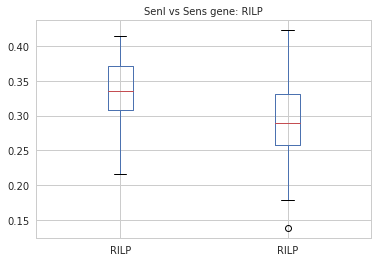

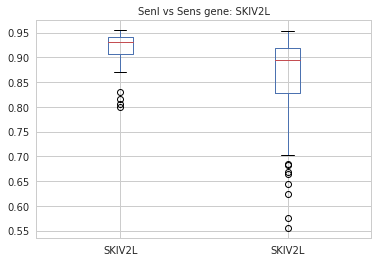

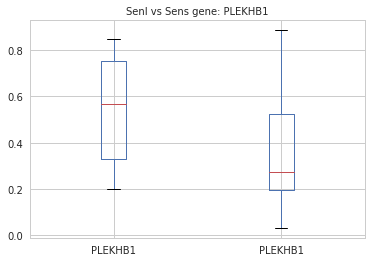

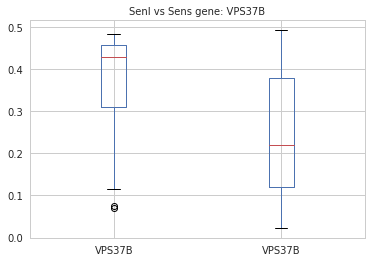

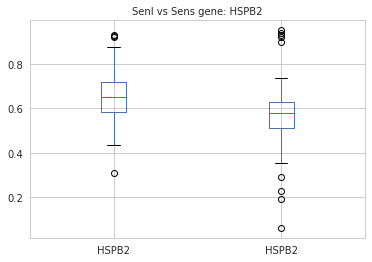

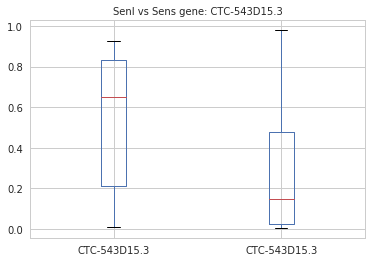

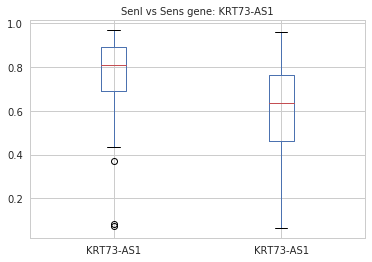

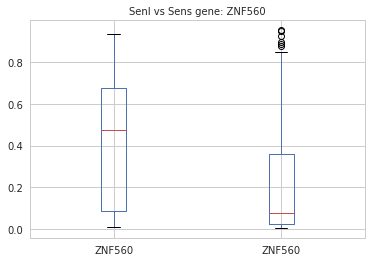

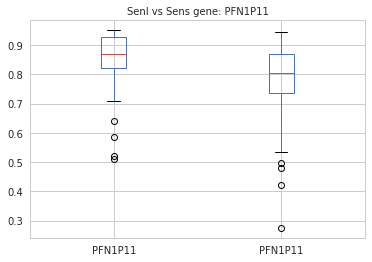

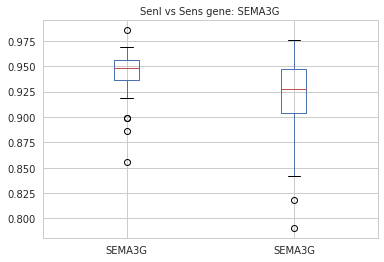

In [83]:
for g in listageni:

    boxplot1=pd.DataFrame(senldf, columns=[g])
    boxplot2=pd.DataFrame(sensdf, columns=[g])
    fig, ax= plt.subplots()
    boxplot3=pd.concat([boxplot1, boxplot2], axis=1)
    ax.set_title('Senl vs Sens gene: '+ g, fontsize = 10)

    boxplot_tot=boxplot3.boxplot(fontsize = 10)
    
    #print(boxplot3)
    #plt.savefig('new_data/methylation/boxplot/sl_ss/boxplot{}.png'.format(g))

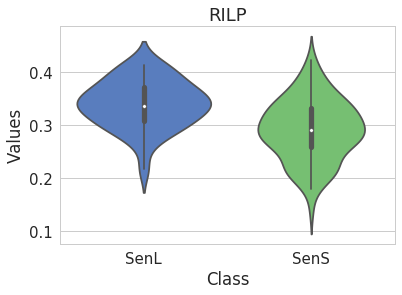

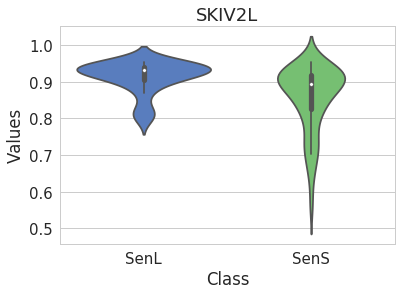

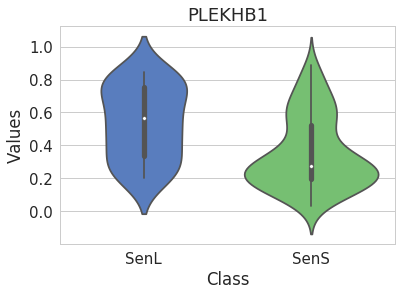

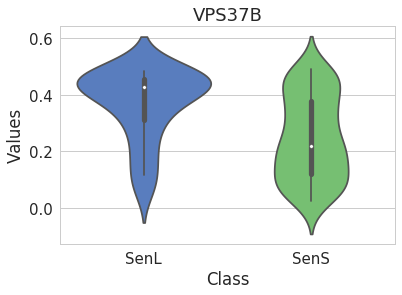

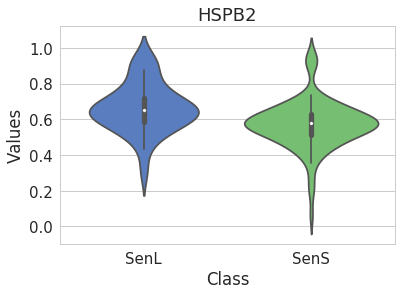

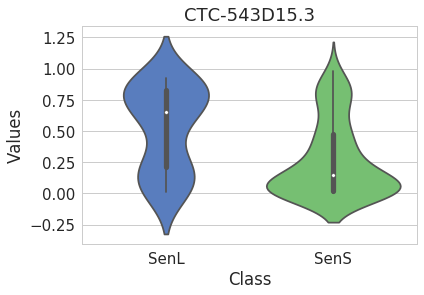

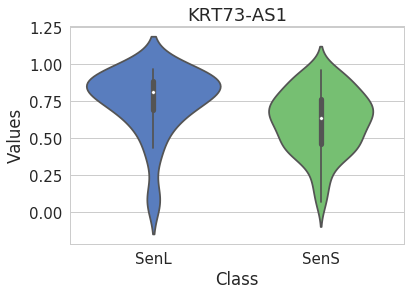

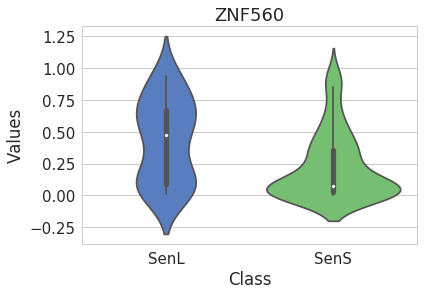

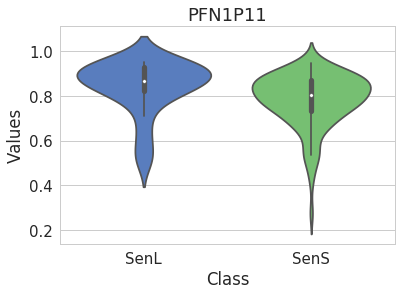

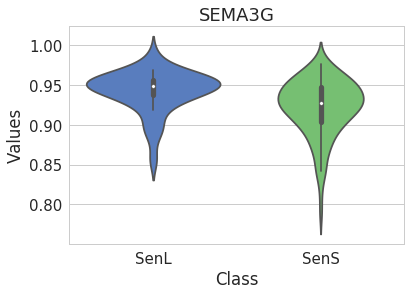

In [84]:
sns.set(style="whitegrid", font_scale=1.5)

for g in listageni[:]:
    data = pd.DataFrame(columns=["Values", "Class"])
    for row in senldf[g]:
        data = data.append({"Values":row,"Class":"SenL"}, ignore_index=True)
    for row in sensdf[g]:
        data = data.append({"Values":row,"Class":"SenS"}, ignore_index=True)
    
    plt.figure()
    sns.violinplot(data=data, x="Class", y="Values", palette="muted", saturation=0.75, alpha=0.7)
    plt.title(g)
    #plt.savefig('new_data/methylation/violinplot/sl_ss/violinplot{}.png'.format(g))

# Standard Deviation

In [40]:
r_std=resdf_std.dropna(axis=1)
sl_std=senldf_std.dropna(axis=1)
ss_std=sensdf_std.dropna(axis=1)

In [41]:
medie_std_r=r_std.median()
medie_std_sl=sl_std.median()
medie_std_ss=ss_std.median()

In [42]:
median_sorted=medie_std_r.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#median_sorted=medie_std_ss.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#median_sorted=medie_std_sl.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [43]:
threshold = 0.6

significant_std = median_sorted[(median_sorted > threshold)].copy()
print(significant_std.shape[0])

119


In [44]:
w=significant_std.to_frame()

In [45]:
w['genes']=w.index
w.index=np.arange(len(w))

In [46]:
lista1=set(w['genes'])
lista2=set(significant_genes_corr ['gene'])

In [47]:
inters=lista1.intersection(lista2)

In [48]:
inters

set()

## FDR

In [177]:
n_res=len(dset_res['patient'].unique())
n_sens=len(dset_sens['patient'].unique())
n_senl=len(dset_senl['patient'].unique())

In [178]:
#p_sorted=pvalues.sort_values(by='mannwhiteney_pvalue')
p_sorted=significant_genes.sort_values(by='mannwhiteney_pvalue')

In [179]:
a=p_sorted['mannwhiteney_pvalue'].get_values()

In [180]:
enumerate(a)

In [181]:
num_total_tests=n_senl+n_sens
#num_total_tests=len(a)

In [182]:
def calc_benjamini_hochberg_corrections(p_values, num_total_tests):
   
    p_value_bh = []
    for i, p_value in enumerate(p_values):
        bh_value = p_value * num_total_tests / (i + 1)
        p_value_bh.append(bh_value)
    return (p_value_bh)

In [183]:
p_value_corr_bh=calc_benjamini_hochberg_corrections(a, num_total_tests)

In [184]:
p_sorted['p_value_corr_bh']=p_value_corr_bh

In [185]:
p_sorted.head()

,gene,sensitive_long_median,sensitive_short_median,mannwhiteney_pvalue,p_value_corr_bh
10225,RILP,0.335616,0.289588,0.000006,0.000788
11856,SKIV2L,0.931839,0.894482,0.000009,0.000624
9200,PLEKHB1,0.568565,0.274356,0.000033,0.001533
14170,VPS37B,0.429182,0.219542,0.000062,0.002179
5787,HSPB2,0.651816,0.577727,0.000070,0.001960


In [186]:
threshold = 0.05

significant_genes_bh = p_sorted[(p_sorted.p_value_corr_bh < threshold)].copy()
significant_genes_bh = significant_genes_bh.sort_values("p_value_corr_bh", ascending=True)
print(significant_genes_bh.shape[0])

1242


In [187]:
significant_genes_bh=pd.DataFrame(significant_genes_bh)
significant_genes_bh.head()

,gene,sensitive_long_median,sensitive_short_median,mannwhiteney_pvalue,p_value_corr_bh
11856,SKIV2L,0.931839,0.894482,0.000009,0.000624
10225,RILP,0.335616,0.289588,0.000006,0.000788
9200,PLEKHB1,0.568565,0.274356,0.000033,0.001533
5787,HSPB2,0.651816,0.577727,0.000070,0.001960
14170,VPS37B,0.429182,0.219542,0.000062,0.002179


In [188]:
#significant_genes_bh.to_csv('new_data/methylation/r_sl_meth_mild.csv', sep=',', header=True, index=False)
#significant_genes_bh.to_csv('new_data/methylation/r_ss_meth_mild.csv', sep=',', header=True, index=False)
#significant_genes_bh.to_csv('new_data/methylation/sl_ss_bh_meth_mild.csv', sep=',', header=True, index=False)